In [1]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

# Unsupervised Learning

## K-Means for Blobs

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

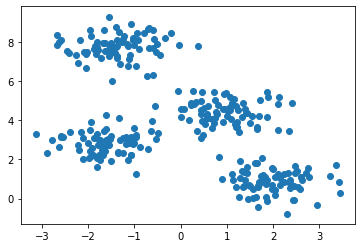

In [3]:
# generate blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1]);

plt.show()

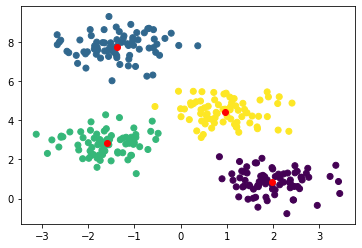

In [4]:
# cluster blobs with just the right value for k
model = KMeans(n_clusters=4)
model.fit(X)
y_kmeans = model.predict(X)

# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=y_kmeans)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

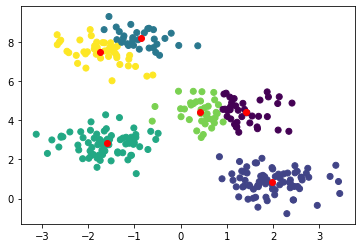

In [5]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=6)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## The Elbow Method

In [6]:
# Source: http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
def elbow(df, n):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from scipy.spatial.distance import cdist, pdist
    
    # kmeans models for each k
    kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n+1)]
    
    # get the centroids of the models
    centroids = [X.cluster_centers_ for X in kMeansVar]
    
    # find the distances of the values to the centroids
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    
    # find the distance of each point to its cluster center
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    
    # total within cluster sum of squares
    wcss = [sum(d**2) for d in dist]
    
    # total sum of squares
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    
    # between clusters sum of squares
    bss = tss - wcss
    
    # plot the variance of the models
    plt.plot(list(range(1,n+1)),bss)
    plt.show()

Number of clusters to generate: 3


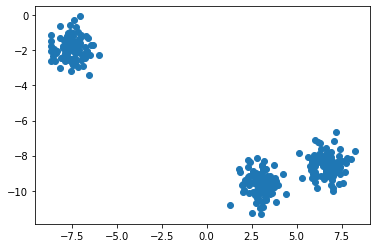

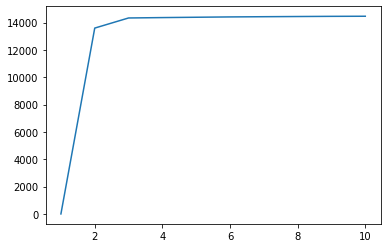

Number of clusters to model: 3


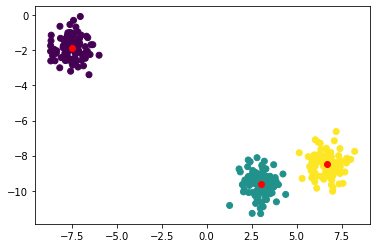

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# generate the data
k = int(input("Number of clusters to generate: "))
X, y = make_blobs(n_samples=k*100, centers=k, cluster_std=0.60)

# plot clusters
plt.scatter(X[:,0], X[:,1]);
plt.show()

# generate elbow plot
elbow(pd.DataFrame(X),10)

# build model for the given k
k = int(input("Number of clusters to model: "))
model = KMeans(n_clusters=k)
model.fit(X)
labels = model.predict(X)

# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## K-Means and non-convex Clusters

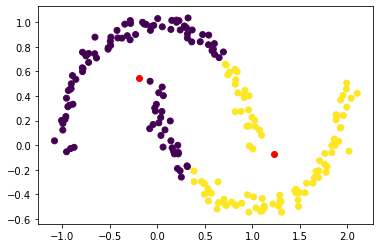

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons

# generate data
X, y = make_moons(200, noise=.05)

# fit model
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()